In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import random
import math as m


In [3]:
train_link = r"C:\Users\Derin\Desktop\semester 1\Signal\HW\04-Supplement-Programming-Materials\train-songs.csv"
test_link  = r"C:\Users\Derin\Desktop\semester 1\Signal\HW\04-Supplement-Programming-Materials\test-songs.csv"

train=pd.read_csv(train_link)
test=pd.read_csv(test_link)
x_train=train.iloc[:, :8]
y_train=train.iloc[:, 8:]
x_test=test.iloc[:, :8]
y_test=test.iloc[:, 8:]

In [81]:
train.head()

,danceability,key,loudness,acousticness,instrumentalness,liveness,valence,tempo,popular
0,0.391,8,-9.532,0.478,0.000006,0.1160,0.138,105.593,0.0
1,0.628,1,-13.834,0.156,0.010400,0.0836,0.761,102.974,0.0
2,0.613,3,-22.789,0.864,0.000000,0.2690,0.371,75.104,0.0
3,0.504,2,-5.931,0.414,0.000000,0.0845,0.163,135.927,1.0
4,0.698,9,-3.840,0.101,0.000000,0.1070,0.931,124.042,1.0


In [12]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as CustomLogisticRegression


In [38]:
lr = CustomLogisticRegression()
lr.fit(x_train, y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
def fit(self, x, y, epochs):
    x = self._transform_x(x)
    y = self._transform_y(y)

    self.weights = np.zeros(x.shape[1])
    self.bias = 1

    for i in range(epochs):
        x_dot_weights = np.matmul(self.weights, x.transpose()) + self.bias
        pred = self._sigmoid(x_dot_weights)
        loss = self.compute_loss(y, pred)
        error_w, error_b = self.compute_gradients(x, y, pred)
        self.update_model_parameters(error_w, error_b)

        pred_to_class = [1 if p > 0.5 else 0 for p in pred]
        self.train_accuracies.append(accuracy_score(y, pred_to_class))
        self.losses.append(loss)

In [106]:
def _sigmoid(self, x):
    return np.array([self._sigmoid_function(value) for value in x])

def _sigmoid_function(self, x):
    if x >= 0:
        z = np.exp(-x)
        return 1 / (1 + z)
    else:
        z = np.exp(x)
        return z / (1 + z)

In [107]:
def compute_loss(self, y_true, y_pred):
    # binary cross entropy
    y_zero_loss = y_true * np.log(y_pred + 1e-9)
    y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
    return -np.mean(y_zero_loss + y_one_loss)



In [108]:
def compute_gradients(self, x, y_true, y_pred):
    # derivative of binary cross entropy
    difference =  y_pred - y_true
    gradient_b = np.mean(difference)
    gradients_w = np.matmul(x.transpose(), difference)
    gradients_w = np.array([np.mean(grad) for grad in gradients_w])

    return gradients_w, gradient_b

In [109]:
def update_model_parameters(self, error_w, error_b):
    self.weights = self.weights - 0.1 * error_w
    self.bias = self.bias - 0.1 * error_b

In [110]:
pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.808


In [111]:
def predict(self, x):
    x_dot_weights = np.matmul(x, self.weights.transpose()) + self.bias
    probabilities = self._sigmoid(x_dot_weights)
    return [1 if p > 0.5 else 0 for p in probabilities]

In [112]:
model = LogisticRegression(solver='newton-cg', max_iter=1000)
model.fit(x_train, y_train)
pred2 = model.predict(x_test)
accuracy2 = accuracy_score(y_test, pred2)
print(accuracy2)

0.808


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


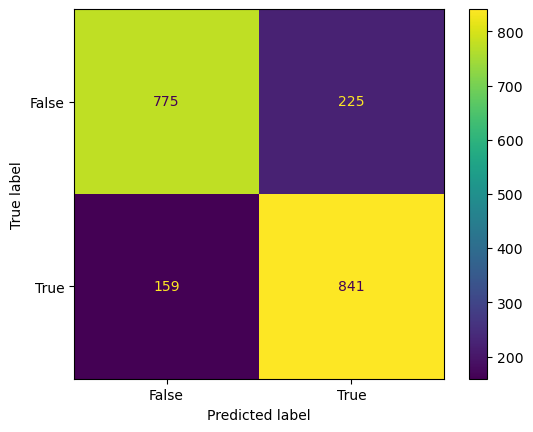

In [113]:
from sklearn import metrics
from matplotlib import pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


In [114]:
pred_array=np.array(pred)
y_test_array=np.array(y_test)

In [115]:
Precision = metrics.precision_score(y_test_array, pred_array)
Precision

0.7889305816135085

In [116]:
recall = metrics.recall_score(y_test_array, pred_array)
recall

0.841

In [117]:
F1_score = metrics.f1_score(y_test_array)
F1_score

TypeError: f1_score() missing 1 required positional argument: 'y_pred'

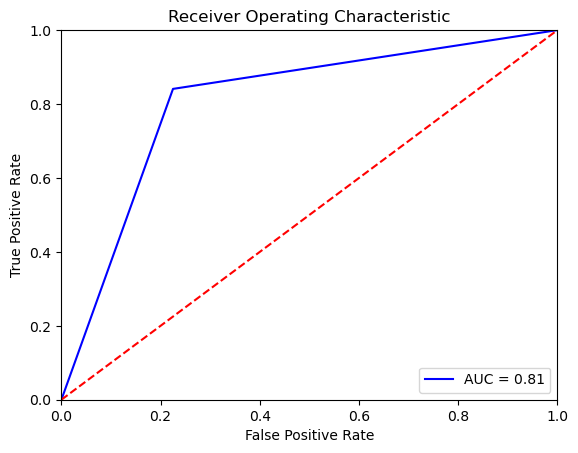

ModuleNotFoundError: No module named 'ggplot'

In [118]:
fpr, tpr, threshold = metrics.roc_curve(y_test_array, pred_array)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')


In [119]:
model_a_train= train[["danceability", "key", "valence", "tempo"]]
model_a_test = test[["danceability", "key", "valence", "tempo"]]
model_b_train= train[[ "danceability", "loudness", "acousticness", "instrumentalness" ]]
model_b_test = test[[ "danceability", "loudness", "acousticness", "instrumentalness" ]]
model_c_train= train[["key", "liveness", "valence", "tempo" ]]
model_c_test= test[["key", "liveness", "valence", "tempo" ]]

In [120]:
model = LogisticRegression(solver='newton-cg', max_iter=1000)
model.fit(model_a_train, y_train)
pred_a = model.predict(model_a_test)
accuracy_a = accuracy_score(y_test, pred_a)
print(accuracy_a)

0.606


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
model = LogisticRegression(solver='newton-cg', max_iter=1000)
model.fit(model_b_train, y_train)
pred_b = model.predict(model_b_test)
accuracy_b = accuracy_score(y_test, pred_b)
print(accuracy_b)

0.7985


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [122]:
model = LogisticRegression(solver='newton-cg', max_iter=1000)
model.fit(model_c_train, y_train)
pred_c = model.predict(model_c_test)
accuracy_c = accuracy_score(y_test, pred_c)
print(accuracy_c)

0.5375


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


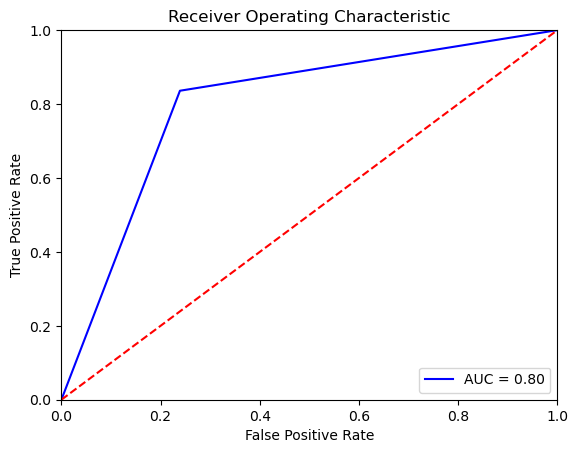

ModuleNotFoundError: No module named 'ggplot'

In [123]:
fpr, tpr, threshold = metrics.roc_curve(y_test_array, pred_b)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
import ggplot
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')


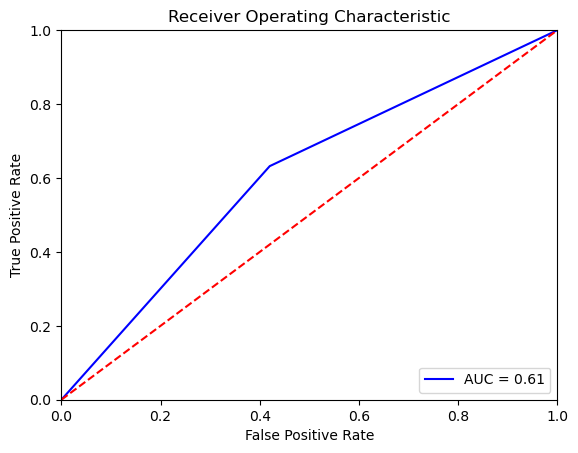

ModuleNotFoundError: No module named 'ggplot'

In [124]:
fpr, tpr, threshold = metrics.roc_curve(y_test_array, pred_a)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
import ggplot
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')


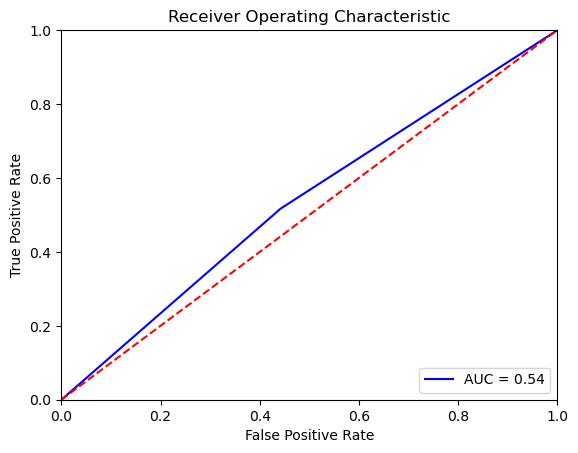

ModuleNotFoundError: No module named 'ggplot'

In [125]:
fpr, tpr, threshold = metrics.roc_curve(y_test_array, pred_c)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
import ggplot
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')
